# GeoParse text

First initialize the geoparser by giving the high and low area threshold in km2. 
Then you can parse a list of str and find the locations in the text. It returns the polygon, name and area of the spatial entities found. 

In [1]:
from geoparsing import OSMGeoParser, safe_join

geoparser = OSMGeoParser(1, 90000)
gdf = geoparser.osm_research(['France', 'Lyon', 'Rhone Alpes', 'les 2 alpes', 'Auvergne', 'Marseille'],\
     how='intersection')

gdf

/Users/arthurcalvi/Venv/GeoParsing/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/arthurcalvi/Repo/GeoParsing/geoparsing.py:15: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.

France
├── France métropolitaine
│   ├── Auvergne-Rhône-Alpes
│   │   ╰── Rhône
│   │       ╰── Métropole de Lyon
│   │           ╰── Lyon
│   ├── Auvergne
│   ╰── Rhône-Alpes
├── 13000
│   ╰── France métropolitaine
│       ╰── Provence-Alpes-Côte d'Azur
│           ╰── Bouches-du-Rhône
│               ╰── Marseille
╰── 63230
    ╰── France métropolitaine
        ╰── Auvergne-Rhône-Alpes
            ╰── Puy-de-Dôme
                ╰── Riom
                    ╰── Saint-Ours
                        ╰── Route de Mazaye
                            ╰── 2
                                ╰── Vulcania



TypeError: 'MultiLineString' object is not subscriptable

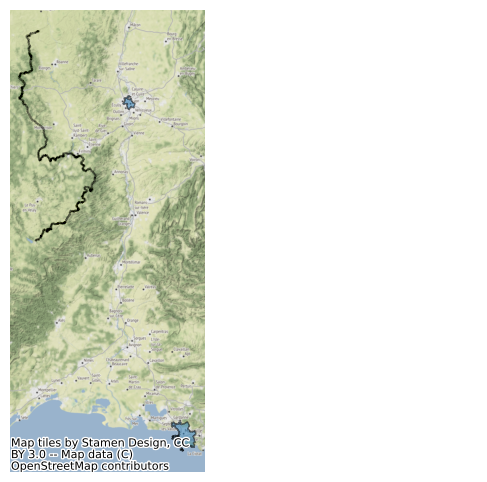

In [2]:
import contextily as cx
# gdf.plot(column='name', legend=True, alpha=0.5)

df_wm = gdf.to_crs(epsg=3857)
ax = df_wm.plot(figsize=(6,6),alpha=0.5, edgecolor='k', column='name')
ax.set_axis_off()
cx.add_basemap(ax)
import matplotlib.pyplot as plt
plt.savefig('ex.png', transparent=True)

# GeoParse DataFrame

In [3]:
import pandas as pd
dfde = pd.read_csv('/Users/arthurcalvi/Data/Disturbances_maps/DFDE_export.csv')
dfde = dfde[ (dfde['end_year'] < 2021) & (dfde['start_year'] > 1986) & (dfde['estimated'] == 0)]
dfde.sort_index(inplace=True)
dfde.head(20)

/var/folders/1c/h8t9_vd53gsgz_wm9kswm8wm0000gp/T/ipykernel_7869/2492363385.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dfde = pd.read_csv('/Users/arthurcalvi/Data/Disturbances_maps/DFDE_export.csv')


,id,internal_id,parent_id,not_event,estimated,start_year,day,month,end_year,area,...,number,overbark,reference,reference_long,notes,status,cause,species,country,location
3170,308,13101,NaN,0,0,1987,NaN,NaN,1987,NaN,...,15.0,NaN,BENOIT DE COIGNAC 1996,"BENOIT DE COIGNAC G., 1996, ""la prévention des...",Number of fires larger than 100 ha and its sha...,NaN,Fire,NaN,France,Republic of France(FR)
3171,334,7740,NaN,0,0,1987,NaN,NaN,1987,202.0,...,NaN,NaN,Bilandzija 1993,"Bilanddzija, J. (1993). “Forest Fires in Croat...",Brushwood,NaN,Fire,NaN,Croatia,Republic of Croatia(HR)
3172,335,7741,NaN,0,0,1987,NaN,NaN,1987,277.0,...,NaN,NaN,Bilandzija 1993,"Bilanddzija, J. (1993). “Forest Fires in Croat...",Maquis,NaN,Fire,NaN,Croatia,Republic of Croatia(HR)
3173,336,7742,NaN,0,0,1987,NaN,NaN,1987,572.0,...,NaN,NaN,Bilandzija 1993,"Bilanddzija, J. (1993). “Forest Fires in Croat...",Garrigue,NaN,Fire,NaN,Croatia,Republic of Croatia(HR)
3174,337,7743,NaN,0,0,1987,NaN,NaN,1987,682.0,...,NaN,NaN,Bilandzija 1993,"Bilanddzija, J. (1993). “Forest Fires in Croat...","Others (pasture land, abandonded agricultural ...",NaN,Fire,NaN,Croatia,Republic of Croatia(HR)
3175,357,7763,NaN,0,0,1987,NaN,NaN,1987,3409.0,...,81.0,NaN,Bilandzija 1993,"Bilanddzija, J. (1993). “Forest Fires in Croat...",On karst,NaN,Fire,NaN,Croatia,Republic of Croatia(HR)
3176,394,7800,NaN,0,0,1987,NaN,NaN,1987,3535.0,...,171.0,NaN,Bilandzija 1993,"Bilanddzija, J. (1993). “Forest Fires in Croat...",Forest fires,NaN,Fire,NaN,Croatia,Republic of Croatia(HR)
3177,567,5483,NaN,0,0,1987,NaN,NaN,1988,130.0,...,NaN,NaN,Baier 2000,"Baier, U. (2000). “Waldschutzsituation 1999/20...",Damaged area in winter 1987/1988,NaN,Mice,NaN,Germany,Mühlhausen/Thüringen(DE)
3178,586,5502,NaN,0,0,1987,NaN,NaN,1987,20.0,...,NaN,NaN,Baier 2000,"Baier, U. (2000). “Waldschutzsituation 1999/20...",Damaged area in summer,NaN,Mice,NaN,Germany,Mühlhausen/Thüringen(DE)
3179,1139,13066,NaN,0,0,1987,NaN,NaN,1987,10392.0,...,2116.0,NaN,Chevrou R. 1998,"Chevrou, R., 1998. Prévention et lutte contre ...",'Provence-Alpes-Côte d'Azur; Auvergne-Rhône-Al...,NaN,Fire,NaN,France,Republic of France(FR)


The inputs needed are :
- Pandas DataFrame
- columns : a list of the names of the columns of the DataFrame on which to perform the geoparsing, ex : ['location', 'country']
- wrapper : a func to add preprocessing or condition to perform the geoparsing
- union : False (to be deprecated)
- root_in : if the location to find should be in a country, and that the country is mentionned in a column, then give the name of that column here. It will check if the location is in this country before returning the polygon

In [ ]:
#Retrieve texts of all events + ponctuation removing 
def wrapper_safe_join(row, columns=list):
    if len(row.country.split(';')) < 4:
        return safe_join(row, columns=columns)
    else :
        return ''


country = 'france'
dfde_fr = dfde[ dfde.country.str.lower().str.contains(country) ]
print(dfde_fr.shape)

gdf = geoparser.from_dataframe(dfde_fr, columns=['notes'],\
     wrapper=wrapper_safe_join, how='intersection', root_in='country', enforce=['location'])

In [6]:
df = gdf.groupby(['start_year', 'end_year', 'cause', 'name'])['notes'].apply(', '.join).reset_index()
df

,start_year,end_year,cause,name,notes
0,1987,1987,Fire,"intersection: Auvergne-Rhône-Alpes,Île-de-Fran...",'Provence-Alpes-Côte d'Azur; Auvergne-Rhône-Al...
1,1987,1987,Fire,intersection: Île-de-France,Number of fires larger than 100 ha and its sha...
2,1987,1987,Ips typographus,"intersection: Emblavez-et-Meygal,Domaine Nordi...",Forêt domaniale du Meygal (Haute-Loire)
3,1987,1987,Ips typographus,"intersection: Île-de-France,Le Tonkin",Plateau du Vercors
4,1987,1987,Wind,intersection: Bretagne,"Public forest. October 15-16, Private forest. ..."
...,...,...,...,...,...
305,2020,2020,Thaumetopoea processionea,intersection: Hesse,Trend: no change
306,2020,2020,Tomicus piniperda;Tomicus minor,intersection: Hesse,Trend: increasing
307,2020,2020,Viscum album,intersection: Hesse,"Trend: increasing, Trend: no change"
308,2020,2020,Wind,intersection: Hesse,Trend: no change


# Apply other parsing and saving

In [7]:
from other_parser import parse_area, parse_date

In [8]:
import fiona
import os 
name = 'france_reg'

out_dir = '/Users/arthurcalvi/Documents/PhD/Data/DFDE_V0/' 
columns = ['id', 'start_date', 'end_date', \
            'cause', 'area', 'species', 'notes', \
            'country', 'location', 'name', \
            'geometry', 'area_km', \
            'reference', 'reference_long']


# gdf['area'] = gdf.apply(parse_area, axis=1)
gdf[['start_date', 'end_date']] = gdf.apply(parse_date, axis=1, result_type='expand')
gdf.start_date = pd.to_datetime(gdf.start_date).apply(str)
gdf.end_date = pd.to_datetime(gdf.end_date).apply(str)

a = os.path.join(out_dir, 'shapefile', f'{name}.shp')
b = os.path.join(out_dir, 'geojson', f'{name}.geojson')

for x in [a,b]:
    os.makedirs(os.path.dirname(x), exist_ok=True)
    
gdf[columns].to_file(a)
gdf[columns].to_file(b)